# Exploring Explainer Dashboards
## CHAPTER 09 - *Other popular XAI frameworks*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

In this notebook, we will explore the application of Explainer Dashboards https://github.com/oegedijk/explainerdashboard for explaining ML models

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib seaborn scikit-learn lime

### Loading the modules

In [25]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

### About the data

**Fifa club position dataset - [Source](link)**




### Loading the data

In [6]:
# We will read the training data
df_train = pd.read_csv('datasets/fifa_league_21_train.csv')
df_test = pd.read_csv('datasets/fifa_league_22_test.csv')

In [10]:
df_train.head()

,short_name,overall,potential,value_eur,wage_eur,age,club_name,league_name,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk,position
0,L. Messi,93,93,103500000.0,560000.0,33,FC Barcelona,Spain Primera Division,CAM,Left,4,4,5,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,32,35,24,6,11,15,14,8,NaN,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,68,68,68,69,65,65,55,55,55,22,3
1,Cristiano Ronaldo,92,92,63000000.0,220000.0,35,Juventus,Italian Serie A,LS,Right,4,5,5,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,28,32,24,7,11,15,14,11,NaN,92,92,92,89,91,91,91,89,91,91,91,91,84,84,84,91,68,64,64,64,68,64,64,57,57,57,23,4
2,R. Lewandowski,91,91,111000000.0,240000.0,31,FC Bayern München,German 1. Bundesliga,ST,Right,4,4,4,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,35,42,19,15,6,12,8,10,NaN,91,91,91,85,87,87,87,85,88,88,88,86,82,82,82,86,67,68,68,68,67,64,64,63,63,63,22,1
3,Neymar Jr,91,91,132000000.0,270000.0,28,Paris Saint-Germain,French Ligue 1,LW,Right,5,5,5,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,35,30,29,9,9,15,15,11,NaN,87,87,87,90,89,89,89,90,91,91,91,91,86,86,86,91,70,65,65,65,70,65,65,52,52,52,23,2
4,K. De Bruyne,91,91,129000000.0,370000.0,29,Manchester City,English Premier League,RCM,Right,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,68,65,53,15,13,5,10,13,NaN,86,86,86,88,88,88,88,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,78,72,72,72,24,1


In [11]:
# Reading the dataset description
with open('datasets/data_description.txt') as f:
    contents = f.read()
    print(contents)

Fifa Club Position Prediction dataset.
--------------------------------------
The dataset is prepared from the Kaggle Fifa 22 Player dataset: https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset. Original dataset acknowledgement is provided to the website sofifa.com as the data is scrapped from the publicly available website.

The training data is for top 10 clubs for the 2021-22 season from English Premier League, La Liga, Serie A, Bundesliga 1, French League 1.

The test data is unlabeled and contains the player information of the same teams for 2022-2023 season.

The datasets contains the following features:

- Players available in FIFA 21, and also FIFA 22 for the selected clubs and leagues

- 80+ attributes

- The club `position` is the target variable that the model needs to predict.

- Player positions, with the role in the club

- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.

- Player ratings out of 100 in differe

In [13]:
# Check dataset dimensions
print(df_train.shape)
print(df_test.shape)

(1584, 82)
(1515, 81)


In [14]:
df_train.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'club_name', 'league_name', 'club_position', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   1584 non-null   object 
 1   overall                      1584 non-null   int64  
 2   potential                    1584 non-null   int64  
 3   value_eur                    1583 non-null   float64
 4   wage_eur                     1584 non-null   float64
 5   age                          1584 non-null   int64  
 6   club_name                    1584 non-null   object 
 7   league_name                  1584 non-null   object 
 8   club_position                1584 non-null   object 
 9   preferred_foot               1584 non-null   object 
 10  weak_foot                    1584 non-null   int64  
 11  skill_moves                  1584 non-null   int64  
 12  international_reputation     1584 non-null   int64  
 13  pace              

As we can see, the dataset contains close to 81 features, out of which input values like the name of the player, name of the club, name of the league and preferred foot might not be helpful to decide the team's position in the next season. The basic intuition is that the team's position is decided by the quality of the players and strength of the players in different playing positions. So, the player's playing position can be an important feature, as it also gives some indication about the depth of the squad in terms of reserves and substitutes, which can be a deciding factor for predicting the club's position. Let's do some data preprocessing based on this intuitions.

### Data Pre-processing

In [18]:
# Drop un-necessary features
features_to_drop = ['short_name', 'club_name', 'league_name', 'preferred_foot']

In [19]:
df_train.drop(columns=features_to_drop, inplace=True)
df_test.drop(columns=features_to_drop, inplace=True)

In [21]:
label = df_train['position']
df_train.drop(columns=['position'], inplace=True)

In [22]:
print(df_train.shape)
print(df_test.shape)

(1584, 77)
(1515, 77)


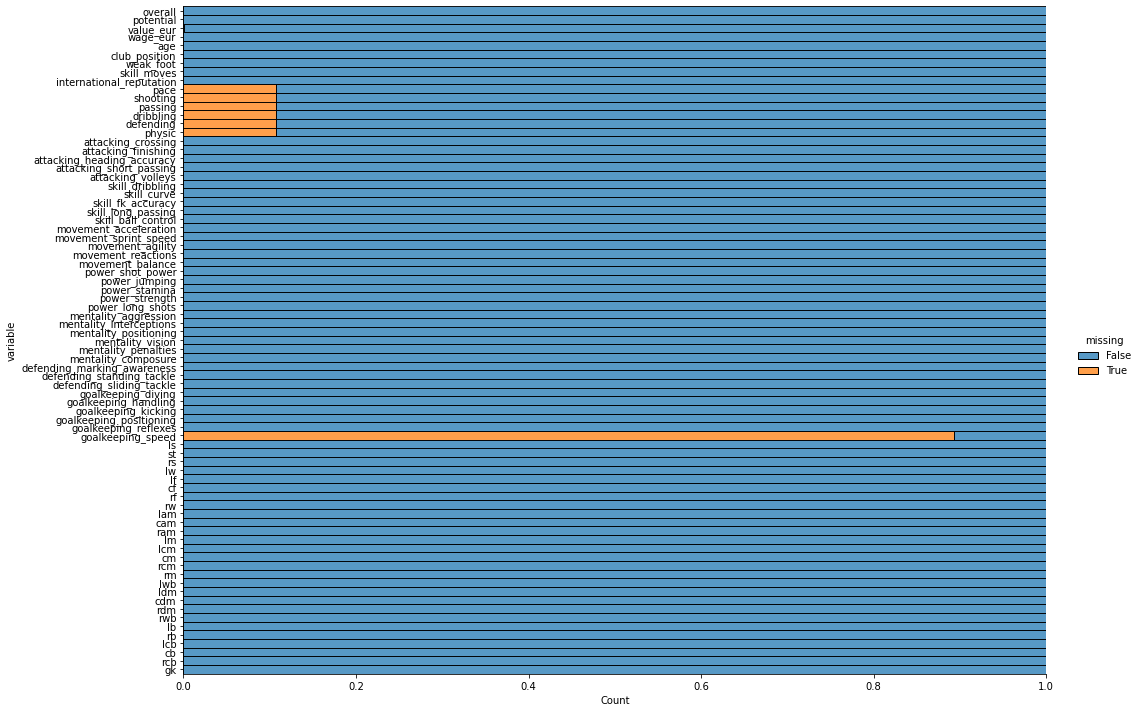

In [27]:
# Let's check missing values

sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=10,
    aspect=1.5
)
plt.show()

As we analyze the missing values, we can see that goalkeeping speed has high percentage of missing values. Hence we can also drop the feature. But for the other missing values related to pace, shooting, passing, dribbling, defending and physic, mostly this data is not available for goal keepers. So, instead of dropping the records related to goal keepers, we will keep a constant value of 40 for all the goal keepers, as the intuitively thinking since these goal keepers are professional players, almost all of them would have a score of atleast 40. There is one missing value under value_eur. It is highly possible that the player has decided to retire and hence no value is assigned. So, we will just drop this record as an outlier.

In [30]:
# dropping the feature 'goalkeeping_speed'
df_train.drop(columns=['goalkeeping_speed'], inplace=True)
df_test.drop(columns=['goalkeeping_speed'], inplace=True)

In [ ]:
# data imputation for the features 'pace', 'shooting', 'passing', 'dribbling', 'defending' and 'physic'

In [31]:
print(df_train.shape)
print(df_test.shape)

(1584, 76)
(1515, 76)


In [ ]:
len(df_train['club_position'].value_counts())

### Training the model

In [7]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=123)

In [8]:
model = GradientBoostingRegressor(n_estimators = 900, max_depth = 2, min_samples_split= 5, learning_rate = 0.01)
model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_split=5,
                          n_estimators=900)

In [9]:
print('The R^2 score for the model is:')
model.score(x_test, y_test)

The R^2 score for the model is:


0.5970059790097703

In [10]:
print('The mean square error for the model is:')
mean_squared_error(y_test, model.predict(x_test))

The mean square error for the model is:


2538.9297946891274

In [9]:
print('The mean absolute percentage error for the model is:')
mean_absolute_percentage_error(y_test, model.predict(x_test))

The mean absolute percentage error for the model is:


0.3766039297492052

### Model Explainability using Explainer Dashboards

## Final Thoughts

## Reference

1. Dataset link -
2. Explainer Dashboard Github project - 
3. Explainer Dashboard Documentation -
4. 
5. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073
6. Want to connect with the author of this chapter? You can reach out by any means mentioned here: https://aditya-bhattacharya.net/contact-me/